# Sobre
Este notepad serve para inserir as avaliações colocadas em planilha dentro do banco de dados.

## Carregamento da Avaliação

In [14]:
import pandas as pd
import sqlite3

In [12]:
df = pd.read_excel(r'Scraping\Rotulagem de Dados Extraídos.xlsx', 'Avaliação')

In [13]:
df.head()

,ibge,procurement_id,Fonte,Produto/Serviço Extraído,Secretaria Extraída,Avaliação Prod/Serv,Avaliação Secretaria,Observação do Avaliador
0,4119905,27/2023/6,Serviços de Internet com link dedicado para o ...,Serviços de Internet com link dedicado,Câmara Municipal de Ponta Grossa,Correto,Erro de Extração,NaN
1,4119905,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Puxadores para janelas tipo “Maxim Ar”,Não informado,Correto,Correto,NaN
2,4119905,25/2023/6,... contratação de empresa habilitada para for...,Relógio protocolador eletrônico,Não informado,Correto,Correto,NaN
3,4119905,24/2023/6,Contratação de empresa especializada para Pres...,Serviços de Saúde e Segurança do Trabalho,Não informado,Correto,Correto,NaN
4,4119905,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Aquisição de 08 refrigeradores tipo frigobar,Não informado,Correto,Correto,NaN


In [16]:
list_id_ibge = list(df['ibge'])
list_id = list(df['procurement_id'])
list_new_value5 = list(df['Avaliação Prod/Serv'])
list_new_value6 = list(df['Avaliação Secretaria'])

In [17]:
def update_procurements_filed(list_id_ibge, list_id, list_new_value, field):

    update = f"UPDATE PROCUREMENTS set {field} = ? where ibge = ? and procurement_id = ?"
    con = sqlite3.connect("scraped.db")
    cursor = con.cursor()
    to_update = []
    for id_ibge, id, new_value in zip(list_id_ibge, list_id, list_new_value):
        to_update.append((new_value, id_ibge, id))
    cursor.executemany(update, to_update)
    con.commit()
    con.close()
    pass

update_procurements_filed(list_id_ibge, list_id, list_new_value5, 'extra5')
update_procurements_filed(list_id_ibge, list_id, list_new_value6, 'extra6')

## Data Analysis

### Correlation Test

In [89]:
import pandas as pd
import sqlite3
import seaborn as sns
%matplotlib inline

In [72]:
con = sqlite3.connect('scraped.db')
sql_command = "Select ibge, procurement_id, goal, extra3, extra5, extra4, extra6 from PROCUREMENTS"
df = pd.read_sql(sql_command, con)
df.set_index(['ibge', 'procurement_id'])
df = df.rename(columns={"goal":"Objeto", "extra3": "Gemini_ProdServ", "extra5": "Eval_ProdServ", "extra4": "Gemini_Camara", "extra6": "Eval_Camara"})
df.head()

,ibge,procurement_id,Objeto,Gemini_ProdServ,Eval_ProdServ,Gemini_Camara,Eval_Camara
0,4119905,27/2023/6,Serviços de Internet com link dedicado para o ...,Serviços de Internet com link dedicado,Correto,Câmara Municipal de Ponta Grossa,Erro de Extração
1,4119905,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Puxadores para janelas tipo “Maxim Ar”,Correto,Não informado,Correto
2,4119905,25/2023/6,... contratação de empresa habilitada para for...,Relógio protocolador eletrônico,Correto,Não informado,Correto
3,4119905,24/2023/6,Contratação de empresa especializada para Pres...,Serviços de Saúde e Segurança do Trabalho,Correto,Não informado,Correto
4,4119905,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Aquisição de 08 refrigeradores tipo frigobar,Correto,Não informado,Correto


In [84]:
df_dummy_camara = pd.get_dummies(df[['Gemini_Camara', 'Eval_Camara']], prefix=['Gemini', 'Eval'], dtype=float)
df_dummy_camara.head()

,Gemini_ABEHD,Gemini_APAE,Gemini_Assistência Social,Gemini_Associação Beneficente Doutor Hugo Dehe,Gemini_Associação de Pais Amigos dos Excepcionais,Gemini_Associação dos acadêmicos de Engenheiro Beltrão/PR,Gemini_Centro de Formação Agrícola Marlene Pereira,Gemini_Centros de Educação Infantil,Gemini_Conselho Tutelar,Gemini_Creche Ana Zenir Salamoni Cury,...,Gemini_UBS Ogamar Linhares,Gemini_Unidades Básicas de Saúde,Gemini_Unidades básicas de saúde,Eval_Alucinação,Eval_Correto,Eval_Dedução Correta,Eval_Erro de Extração,Eval_Falta de Dados,Eval_Sem Extrair,Eval_X Dados ausentes e Alucinação
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

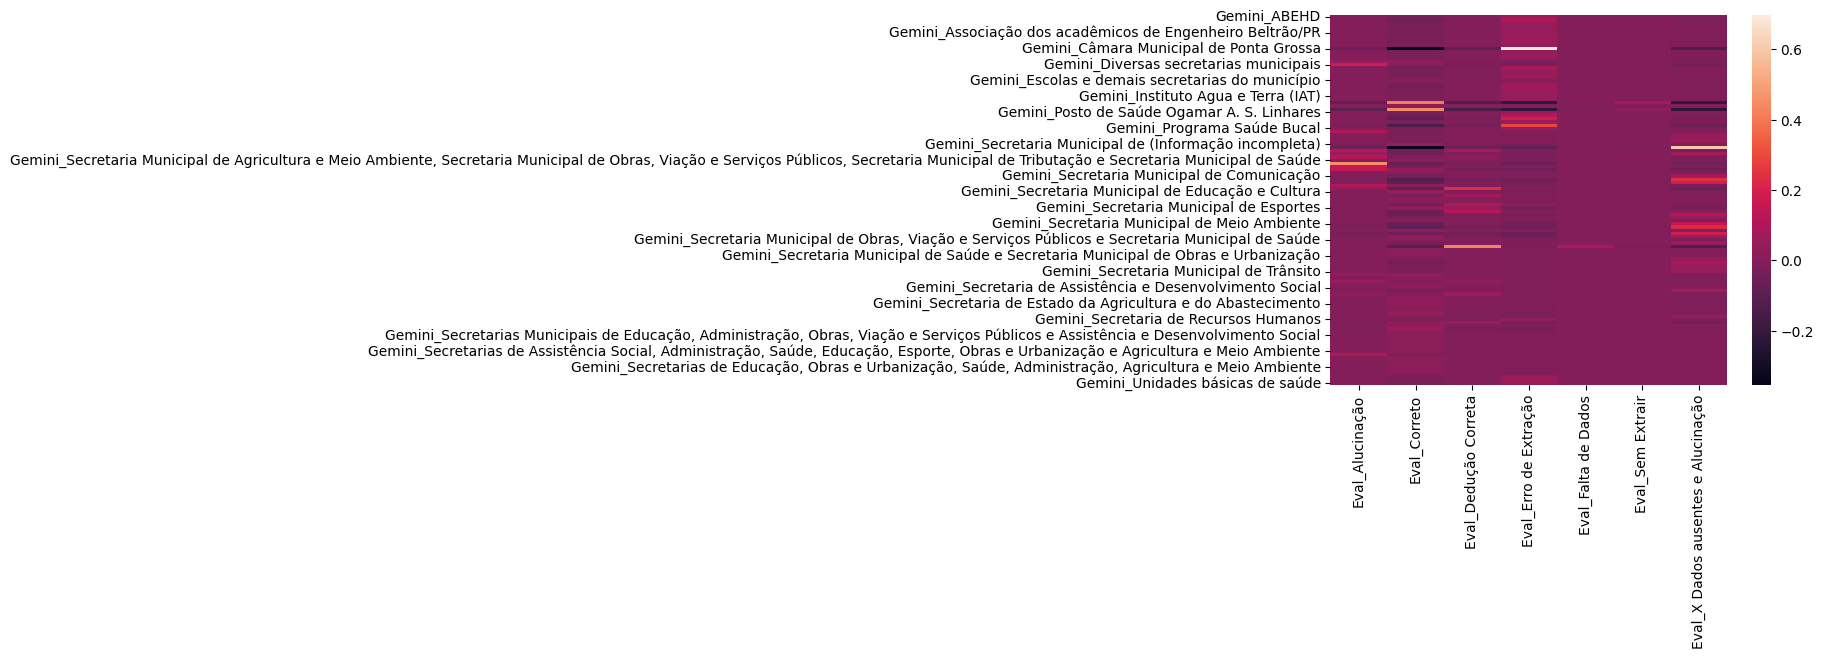

In [90]:
Gemini_Camara_columns = df_dummy_camara.columns.values
Gemini_Camara_columns = list(filter(lambda x: x.startswith('Gemini'), Gemini_Camara_columns))
Eval_Camara_columns = df_dummy_camara.columns.values
Eval_Camara_columns = list(filter(lambda x: x.startswith('Eval'), Eval_Camara_columns))

df_camara_corr = df_dummy_camara.corr()
df_camara_corr = df_camara_corr[Eval_Camara_columns].loc[Gemini_Camara_columns]
sns.heatmap(df_camara_corr)

Claramente os dados precisam ser higienizados antes da análise, visto que existem muitos rótulos aplicados pelo Gemini e vários podem ser agregados, da seguinte forma:
* Objetos com mais de uma camara podem ser reclassificados em uma cartegoria geral "mais de uma secretaria";
* Algumas secretarias tem grafias diferentes como "Secretaria Municipal de Saúde", "Secretária Municipal de Saúde" e "Secretaria de Saúde" e podem ser agregadas, serão classificadas como "Diversas";
* Por fim, orgãos que não são secretarias, podem ser agrupados também, exemplo "Câmara Municipal de Ponta Grossa", "APAE" e "ABEHD", serão classificadas como "orgão que não é Secretaria";
* Gemini não completou a sentença informando qual secretaria se trata serão classificadas como "Informação incompleta", embora possam ser muito similares ao "Não informado".

Infelizmente devido ao volume a natureza dos dados de produto e serviço, os dados não podem ser agrupados em grupos claros, desta forma, não serão analisados.


### Higienização

Foi criada uma planilha para higienizar os dados fazendo um agrupamento simples. Esta planilha será carregada no banco de dados na coluna ```extra7``` da tabela ```PROCUREMENTS```.

In [100]:
import csv
import sqlite3

def update_procurements_extra7(list_aggregate, list_gemini_class):

    update = f"UPDATE PROCUREMENTS set extra7 = ? where UPPER(extra4) = UPPER(?)"
    con = sqlite3.connect("scraped.db")
    cursor = con.cursor()
    to_update = []
    for agregate, gemini_class in zip(list_aggregate, list_gemini_class):
        to_update.append((agregate, gemini_class))
    cursor.executemany(update, to_update)
    con.commit()
    con.close()
    pass


list_aggregate = []
list_gemini_class = []
with open("Scraping\DePara Higienização.csv", 'r', encoding='latin-1') as file:
    csvreader = csv.reader(file, delimiter=';', quotechar='"')
    header = next(csvreader)
    for row in csvreader:
        list_gemini_class.append(row[0])
        list_aggregate.append(row[1])

update_procurements_extra7(list_aggregate, list_gemini_class)


In [102]:
#Check
con = sqlite3.connect('scraped.db')
sql_command = "Select ibge, procurement_id, goal, extra4, extra6, extra7 from PROCUREMENTS"
df = pd.read_sql(sql_command, con)
df.set_index(['ibge', 'procurement_id'])
df = df.rename(columns={"goal":"Objeto", "extra4": "Gemini_Camara", "extra6": "Eval_Camara", "extra7": "Aggregate_Camara"})
df.head()

,ibge,procurement_id,Objeto,Gemini_Camara,Eval_Camara,Aggregate_Camara
0,4119905,27/2023/6,Serviços de Internet com link dedicado para o ...,Câmara Municipal de Ponta Grossa,Erro de Extração,orgão que não é Secretaria
1,4119905,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Não informado,Correto,Não informado
2,4119905,25/2023/6,... contratação de empresa habilitada para for...,Não informado,Correto,Não informado
3,4119905,24/2023/6,Contratação de empresa especializada para Pres...,Não informado,Correto,Não informado
4,4119905,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Não informado,Correto,Não informado


Após a higienização vamos tentar novamente avaliar a matrix de correlação

### Correlation Matrix

In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns
%matplotlib inline

In [104]:
con = sqlite3.connect('scraped.db')
sql_command = "Select ibge, procurement_id, goal, extra7, extra6 from PROCUREMENTS"
df = pd.read_sql(sql_command, con)
df.set_index(['ibge', 'procurement_id'])
df = df.rename(columns={"goal":"Objeto", "extra7": "Gemini_Agregated", "extra6": "Manual_Evaluation"})
df.head()

,ibge,procurement_id,Objeto,Gemini_Agregated,Manual_Evaluation
0,4119905,27/2023/6,Serviços de Internet com link dedicado para o ...,orgão que não é Secretaria,Erro de Extração
1,4119905,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Não informado,Correto
2,4119905,25/2023/6,... contratação de empresa habilitada para for...,Não informado,Correto
3,4119905,24/2023/6,Contratação de empresa especializada para Pres...,Não informado,Correto
4,4119905,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Não informado,Correto


In [105]:
df_dummy_camara = pd.get_dummies(df[['Gemini_Agregated', 'Manual_Evaluation']], prefix=['Gemini', 'Eval'], dtype=float)
df_dummy_camara.head()

,Gemini_Diversas,Gemini_Informação incompleta,Gemini_Não informado,Gemini_de Administração,Gemini_de Agricultura/Abastecimento,Gemini_de Agricultura/Abastecimento/Meio Ambiente,Gemini_de Assistência/Desenvolvimento Social/Ação Social,Gemini_de Comunicação,Gemini_de Desenvolvimento Econômico,Gemini_de Educação/Cultura,...,Gemini_de Trabalho e Emprego,Gemini_de Trânsito/Transporte,Gemini_orgão que não é Secretaria,Eval_Alucinação,Eval_Correto,Eval_Dedução Correta,Eval_Erro de Extração,Eval_Falta de Dados,Eval_Sem Extrair,Eval_X Dados ausentes e Alucinação
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

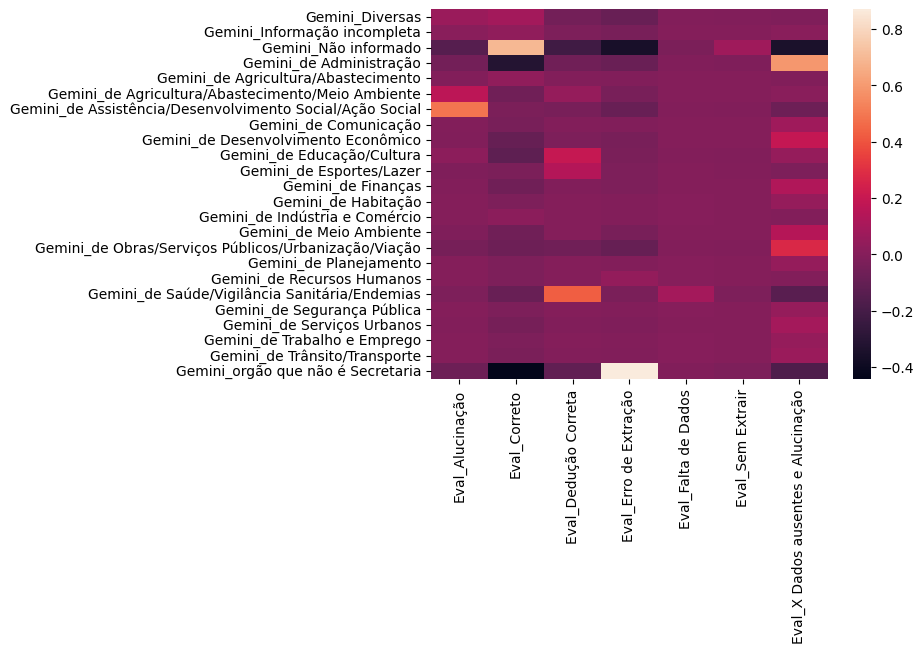

In [106]:
Gemini_Camara_columns = df_dummy_camara.columns.values
Gemini_Camara_columns = list(filter(lambda x: x.startswith('Gemini'), Gemini_Camara_columns))
Eval_Camara_columns = df_dummy_camara.columns.values
Eval_Camara_columns = list(filter(lambda x: x.startswith('Eval'), Eval_Camara_columns))

df_camara_corr = df_dummy_camara.corr()
df_camara_corr = df_camara_corr[Eval_Camara_columns].loc[Gemini_Camara_columns]
sns.heatmap(df_camara_corr)

## BOW

In [2]:
import pandas as pd
import sqlite3
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

In [3]:
# Obter dados
con = sqlite3.connect('scraped.db')
sql_command = "Select ibge, procurement_id, goal, extra4, extra6 from PROCUREMENTS"
df = pd.read_sql(sql_command, con)
df.head()

,ibge,procurement_id,goal,extra4,extra6
0,4119905,27/2023/6,Serviços de Internet com link dedicado para o ...,Câmara Municipal de Ponta Grossa,Erro de Extração
1,4119905,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Não informado,Correto
2,4119905,25/2023/6,... contratação de empresa habilitada para for...,Não informado,Correto
3,4119905,24/2023/6,Contratação de empresa especializada para Pres...,Não informado,Correto
4,4119905,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Não informado,Correto


In [4]:
list_goal = list(df['goal'])
list_goal_min = []
for goal in list_goal:
    list_goal_min.append(' '.join(re.findall(r'[a-zéóáêâãõç]+', goal.lower())))


vec = CountVectorizer()
data_goal = vec.fit_transform(list_goal_min)
bow = pd.DataFrame(data_goal.toarray(), columns=vec.get_feature_names_out()) #.set_index(['symbol', 'date'])
bow.head()

,abada,abadá,abaixo,abastecedor,abastecer,abastecimento,abehd,aberto,abertura,abnt,...,ência,óculos,óleo,ópera,óptica,ópticas,óptico,órgão,órgãos,õnibus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

In [51]:
tf_idf = pd.merge(df, bow, left_index=True, right_index=True)
tf_idf.set_index(['ibge', 'procurement_id'])
tf_idf.head()

,ibge,procurement_id,goal,extra4,extra6,abada,abadá,abaixo,abastecedor,abastecer,...,ência,óculos,óleo,ópera,óptica,ópticas,óptico,órgão,órgãos,õnibus
0,4119905,27/2023/6,Serviços de Internet com link dedicado para o ...,Câmara Municipal de Ponta Grossa,Erro de Extração,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4119905,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Não informado,Correto,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4119905,25/2023/6,... contratação de empresa habilitada para for...,Não informado,Correto,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4119905,24/2023/6,Contratação de empresa especializada para Pres...,Não informado,Correto,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4119905,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Não informado,Correto,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#tf_idf.loc[-1] = (tf_idf[tf_idf.columns.difference(['ibge', 'procurement_id', 'goal', 'extra4', 'extra6'])] > 0).sum()

In [55]:
tf_idf_a = tf_idf[['ibge', 'procurement_id', 'goal', 'extra4', 'extra6', 'saude']]
tf_idf_a.sort_index().round(decimals=2)
tf_idf_a.head()

,ibge,procurement_id,goal,extra4,extra6,saude
0,4119905.0,27/2023/6,Serviços de Internet com link dedicado para o ...,Câmara Municipal de Ponta Grossa,Erro de Extração,0.0
1,4119905.0,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Não informado,Correto,0.0
2,4119905.0,25/2023/6,... contratação de empresa habilitada para for...,Não informado,Correto,0.0
3,4119905.0,24/2023/6,Contratação de empresa especializada para Pres...,Não informado,Correto,0.0
4,4119905.0,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Não informado,Correto,0.0


In [60]:
tf_idf_a = tf_idf[['saude', 'transporte', 'ambulancia']]
tf_idf_a.sort_index().round(decimals=2)
tf_idf_a

,saude,transporte,ambulancia
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
2398,0.0,0.0,0.0
2399,0.0,0.0,0.0
2400,0.0,0.0,0.0
2401,1.0,0.0,0.0


In [61]:
tf_idf_a = tf_idf_a.drop(-1, errors='ignore')

tf_idf_a.stack().reset_index()

,level_0,level_1,0
0,0,saude,0.0
1,0,transporte,0.0
2,0,ambulancia,0.0
3,1,saude,0.0
4,1,transporte,0.0
...,...,...,...
7201,2400,transporte,0.0
7202,2400,ambulancia,0.0
7203,2401,saude,1.0
7204,2401,transporte,0.0
